<div class="alert alert-block alert-info" align="center">
    <h1>
        Imports
    </h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mnist

<div class="alert alert-block alert-info" align="center">
    <h1>
        Déclarations
    </h1>
</div>

In [2]:
class Conv3x3:
    # A Convolution layer using 3x3 filters.

    def __init__(self, num_filters):
        self.num_filters = num_filters

        # filters is a 3d array with dimensions (num_filters, 3, 3)
        # We divide by 9 to reduce the variance of our initial values
        self.filters = np.random.randn(num_filters, 3, 3) / 9

    def iterate_regions(self, image):
        '''
        Generates all possible 3x3 image regions using valid padding.
        - image is a 2d numpy array
        '''
        h, w = image.shape

        for i in range(h - 2):
            for j in range(w - 2):
                im_region = image[i:(i + 3), j:(j + 3)]
                yield im_region, i, j

    def forward(self, input):
        '''
        Performs a forward pass of the conv layer using the given input.
        Returns a 3d numpy array with dimensions (h, w, num_filters).
        - input is a 2d numpy array
        '''
        h, w = input.shape
        output = np.zeros((h - 2, w - 2, self.num_filters))

        for im_region, i, j in self.iterate_regions(input):
            output[i, j] = np.sum(im_region * self.filters, axis=(1, 2))

        return output

class MaxPool2:
    # A Max Pooling layer using a pool size of 2.

    def iterate_regions(self, image):
        '''
        Generates non-overlapping 2x2 image regions to pool over.
        - image is a 2d numpy array
        '''
        h, w, _ = image.shape
        new_h = h // 2
        new_w = w // 2

        for i in range(new_h):
            for j in range(new_w):
                im_region = image[(i * 2):(i * 2 + 2), (j * 2):(j * 2 + 2)]
                yield im_region, i, j

    def forward(self, input):
        '''
        Performs a forward pass of the maxpool layer using the given input.
        Returns a 3d numpy array with dimensions (h / 2, w / 2, num_filters).
        - input is a 3d numpy array with dimensions (h, w, num_filters)
        '''
        h, w, num_filters = input.shape
        output = np.zeros((h // 2, w // 2, num_filters))

        for im_region, i, j in self.iterate_regions(input):
            output[i, j] = np.amax(im_region, axis=(0, 1))

        return output

<div class="alert alert-block alert-info" align="center">
    <h1>
        Applications
    </h1>
</div>

MNIST CNN initialized !

Step 10/100 Past 100 steps :
Data :
[ 0.22255609 -0.08159992 -0.17939323 ...  0.28319202  0.03369086
 -0.05999865]
Image :


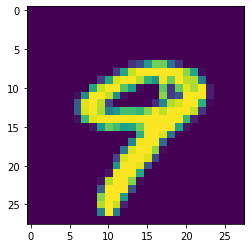


Step 20/100 Past 100 steps :
Data :
[ 0.22255609 -0.08159992 -0.17939323 ...  0.28319202  0.03369086
 -0.05999865]
Image :


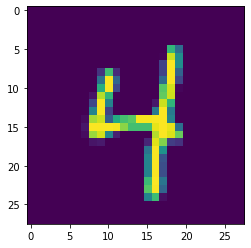


Step 30/100 Past 100 steps :
Data :
[ 0.22255609 -0.08159992 -0.17939323 ...  0.28319202  0.03369086
 -0.05999865]
Image :


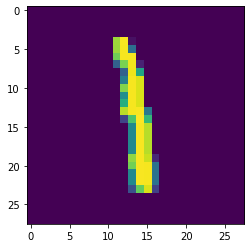


Step 40/100 Past 100 steps :
Data :
[ 0.22255609 -0.08159992 -0.17939323 ...  0.28319202  0.03369086
 -0.05999865]
Image :


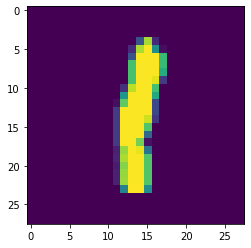


Step 50/100 Past 100 steps :
Data :
[ 0.22255609 -0.08159992 -0.17939323 ...  0.28319202  0.03369086
 -0.05999865]
Image :


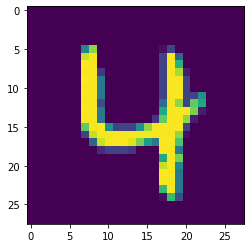


Step 60/100 Past 100 steps :
Data :
[ 0.22255609 -0.08159992 -0.17939323 ...  0.28319202  0.03369086
 -0.05999865]
Image :


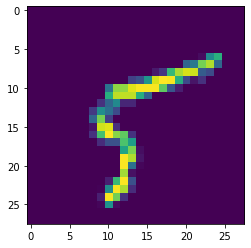


Step 70/100 Past 100 steps :
Data :
[ 0.22255609 -0.08159992 -0.17939323 ...  0.28319202  0.03369086
 -0.05999865]
Image :


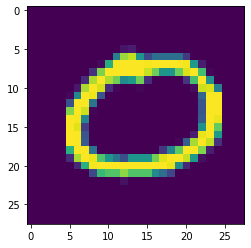


Step 80/100 Past 100 steps :
Data :
[ 0.22255609 -0.08159992 -0.17939323 ...  0.28319202  0.03369086
 -0.05999865]
Image :


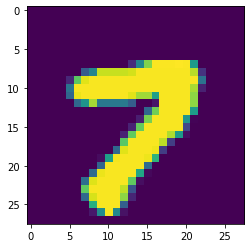


Step 90/100 Past 100 steps :
Data :
[ 0.22255609 -0.08159992 -0.17939323 ...  0.28319202  0.03369086
 -0.05999865]
Image :


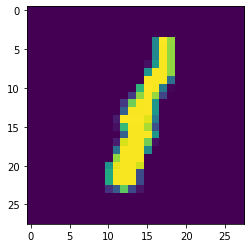


Step 100/100 Past 100 steps :
Data :
[ 0.22255609 -0.08159992 -0.17939323 ...  0.28319202  0.03369086
 -0.05999865]
Image :


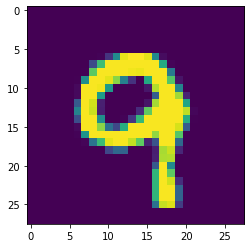

In [3]:
# We only use the first 1k testing examples (out of 10k total)
# in the interest of time. Feel free to change this if you want.
test_images = mnist.test_images()[:100]
test_labels = mnist.test_labels()[:100]

conv = Conv3x3(8)                  # 28x28x1 -> 26x26x8
pool = MaxPool2()                  # 26x26x8 -> 13x13x8

def forward(image, label):
    '''
    Completes a forward pass of the CNN and calculates the accuracy and
    cross-entropy loss.
    - image is a 2d numpy array
    - label is a digit
    '''
    # We transform the image from [0, 255] to [-0.5, 0.5] to make it easier
    # to work with. This is standard practice.
    outConv = conv.forward((image / 255) - 0.5)
    #print(f'La sortie du outConv :\n{outConv}')
    outPool = pool.forward(outConv)
    #print(f'La sortie du outPool :\n{outPool}')
    outFlat = outPool.flatten()
    #print(f'La sortie du outFlat :\n{outFlat}')

    return outFlat

print('MNIST CNN initialized !')

array = []
loss = 0
num_correct = 0
file = open("csv/MNN.csv", "w+")
for i, (im, label) in enumerate(zip(test_images, test_labels)):
    # Do a forward pass.
    output = forward(im, label) #Ajouter le label au csv

    # Print stats every 100 steps.
    if i % 10 == 9:
        print(f'\nStep {i+1}/100 Past 100 steps :')
        print(f'Data :')
        print(output)
        print(f'Image :')
        plt.imshow(im)
        plt.show()
        array.append(output)
df = pd.DataFrame(array)
df.to_csv("csv/MNN.csv", sep=";")
file.close()